<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Get_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hand-Training Datasets
Here are data sets of the human connectome project manually classified for FIX.

https://www.fmrib.ox.ac.uk/datasets/FIX-training/

In [0]:
import glob
import numpy as np
import os
import scipy.io as sio
import matplotlib.pyplot as plt

In [0]:
gz=glob.glob('*.tar.gz')
files=np.shape(gz)[0]

if files==0:
  #Download
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs1-20.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs21-40.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs41-60.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs61-80.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs81-100.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_run1.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/WhII_MB6.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/WhII_Standard.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/Standard.tar.gz')
else:
  print('The files already exist')

In [3]:
gz=glob.glob('*.tar.gz')
print('gz files ', np.shape(gz)[0])

if os.path.exists('All_Datas'):
  print('The folder already exist')
else:
  print('Creating folder...')
  os.system('mkdir All_Datas')
  print('...process completed')

gz files  1
Creating folder...
...process completed


In [4]:
folders=glob.glob('All_Datas/*')
No=np.shape(folders)[0]

if No==0:
  for i in gz:
    print('tar -xzvf '+i+' -C All_Datas')
    os.system('tar -xzvf '+i+' -C All_Datas')
else: 
  print('unzipped files')

tar -xzvf HCP_hp2000_runs1-20.tar.gz -C All_Datas


In [5]:
folders=np.sort(glob.glob('All_Datas/*'))
print(folders)

['All_Datas/HCP_hp2000']


### Subjects by folders

In [6]:
for f in folders:
  subjects=glob.glob(f+'/*')
  print(np.shape(subjects)[0], 'subjects in ', f)

20 subjects in  All_Datas/HCP_hp2000


# Get time series and labels

In [12]:
compSub=[]
conver=np.vectorize(int)

AllData=np.zeros((1200,1))
AllLabels=[]

for f in folders:
  subjects=glob.glob(f+'/*')
  subjects=np.sort(subjects)
  
  for sub in subjects:
    #Leer serie de tiempo
    series=np.loadtxt(sub+"/filtered_func_data.ica/melodic_mix")
    comp=np.shape(series)[1]
    compSub.append(comp)
    print('Components per subject ', comp)
    label1=np.ones(comp)    
    AllData=np.concatenate((AllData,series), axis=1)
    
    #Leer etiquetas manuales
    f = open(sub+"/hand_labels_noise.txt") 
    while True:
      line = f.readline()
      if line=='':
        break
      handClas=line[1:-2]
    handClas= handClas.split(", ")
    handClas=conver(handClas)-1
    label1[handClas]=0
    AllLabels=np.concatenate((AllLabels, label1))
    print('Noise per subject ', np.shape(handClas))
    f.close()
    
AllData=AllData[:,1:]

Components per subject  250
Noise per subject  (230,)
Components per subject  250
Noise per subject  (233,)
Components per subject  237
Noise per subject  (226,)
Components per subject  247
Noise per subject  (234,)
Components per subject  250
Noise per subject  (225,)
Components per subject  250
Noise per subject  (223,)
Components per subject  245
Noise per subject  (220,)
Components per subject  250
Noise per subject  (216,)
Components per subject  250
Noise per subject  (229,)
Components per subject  250
Noise per subject  (234,)
Components per subject  250
Noise per subject  (230,)
Components per subject  250
Noise per subject  (226,)
Components per subject  250
Noise per subject  (232,)
Components per subject  250
Noise per subject  (224,)
Components per subject  250
Noise per subject  (228,)
Components per subject  250
Noise per subject  (222,)
Components per subject  250
Noise per subject  (220,)
Components per subject  250
Noise per subject  (225,)
Components per subject  235


### Components per subject

248.2
4.261455150532504


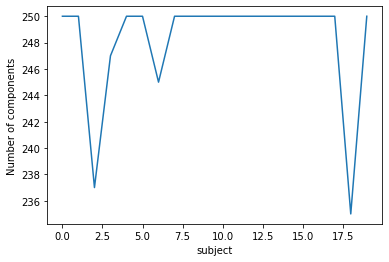

In [13]:
plt.plot(compSub)
plt.xlabel('subject')
plt.ylabel('Number of components')
print(np.mean(compSub))
print(np.std(compSub))

#Shape

In [17]:
print('points time and components')
print(np.shape(AllData))
print('labels per components')
print(np.shape(AllLabels))

points time and components
(1200, 4964)
labels per components
(4964,)


# Plot components

(1200, 4964)


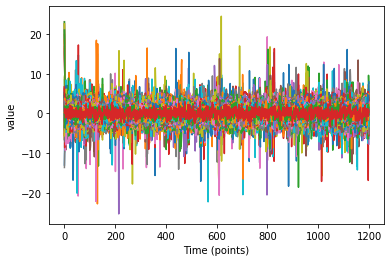

In [19]:
plt.plot(AllData)
plt.xlabel('Time (points)')
plt.ylabel('value')
print(np.shape(AllData))

# Save data

In [0]:
sio.savemat('Data.mat', {'series': AllData})
sio.savemat('Labels.mat', {'labels': AllLabels})

In [22]:
print('Noise components  ', np.sum(AllLabels==0))
print('Signal components ', np.sum(AllLabels==1))

Noise components   4518
Signal components  446
